In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import pandas as pd
import os

In [1]:
plot_pth = 'BayesianOneShotVsBayesianVariationRatio/'
class getMetric():

    def __init__(self, type, pth):
        self.files = [f for f in os.listdir(pth)]
        self.files = sorted(self.files, key=lambda x: int(x.split('round')[1].split('.csv')[0]))
        if type == 'accuracy':
            indx = 10
        # classification error
        self.metric = [1 - pd.read_csv(pth + f).iloc[indx][1] for f in self.files][:40]

def PlotGraph(figure_nam,data_locs,labels):
    metric_list = [getMetric('accuracy',pth).metric for pth in data_locs]
    rounds = range(len(metric_list[0]))
    colors = ['#9B59B6','#76D7C4','#F5B041','#E74C3C']
    markers = ['o','o','^','^']

    font = {'family': 'Serif',
            'weight': 'normal',
            'size': 14}
    rc('font', **font)
    if not figure_nam:
        figure_nam = 'my_fig.png'
    plt.figure(num=1, figsize=(14, 7))
    ax = plt.axes()
    for i,m in enumerate(metric_list):
        ax.plot(rounds, m, marker=markers[i], color=colors[i], label=labels[i])

    ax.set_ylabel('classification error', fontsize=18)
    ax.set_xlabel(r'# samples ($\times 50$)', fontsize=18)
    ax.legend(loc=1, ncol=1, frameon=True)
    plt.savefig(plot_pth+figure_nam, orientation='portrait', bbox_inches='tight', dpi=300)

<h4 align="center">One Shot vs Conventional Bayesian Active Learning</h4>

2020-03-31 17:46:23 
<p>It is interesting to see that the proposed One-Shot has a performance on-par with the complete uncertainty estimation using BAL-VR and BAL-E</p>

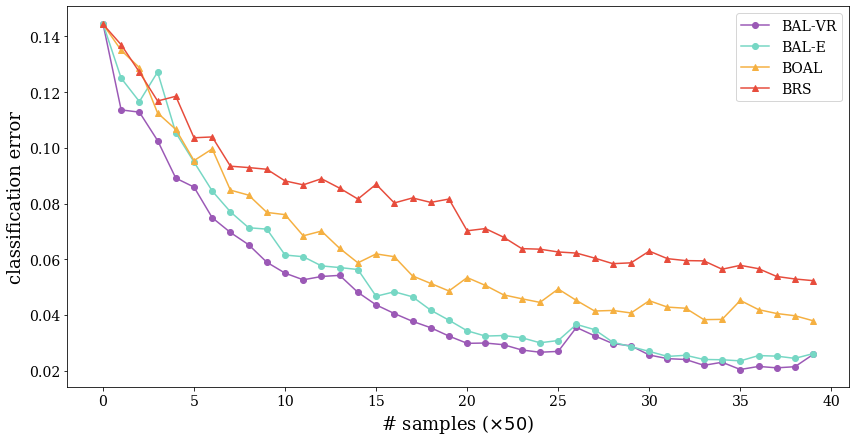

In [3]:
# bayesian results
pth_1 = '../results_archive/Blenet300-100_mnist_isample500_e15_r41_ac1_b100_Klreg-standard2_retrain0/'
pth_2 = '../results_archive/Blenet300-100_mnist_isample500_e15_r41_ac0_b100_Klreg-standard2_retrain0/'
pth_3 = '../results/Blenet300-100_mnist_isample500_e15_r41_ac0_b100_Klreg-standard2_retrain0/'
locs = [pth_1, pth_2, pth_3, pth_4]
labels = ['BAL-VR','BAL-E','BOAL','BRS']
f_name = 'fig_a'
PlotGraph(f_name,locs,labels)

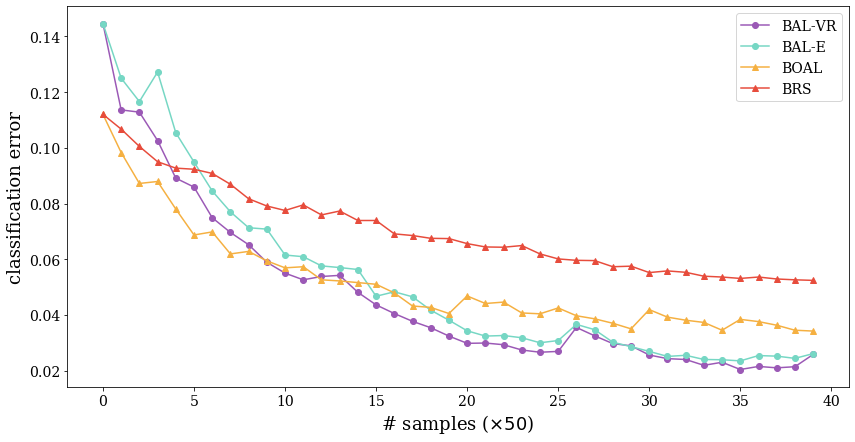

In [4]:
# 1000 initial samples - KL regularizer standard
pth_1 = '../results_archive/Blenet300-100_mnist_isample500_e15_r41_ac1_Klreg-standard2_b100_mcmc5_netType-blundell_variation-ratio_retrain0/'
pth_2 = '../results_archive/Blenet300-100_mnist_isample500_e15_r41_ac1_Klreg-standard2_b100_mcmc5_netType-blundell_entropy_retrain0/'

# bayesian results
pth_3 = '../results_archive/Blenet300-100_mnist_isample1000_e15_r41_ac1_b100_Klreg-standard2_retrain0/'
pth_4 = '../results_archive/Blenet300-100_mnist_isample1000_e15_r51_ac0_b100_Klreg-standard2_retrain0/'
locs = [pth_1, pth_2, pth_3, pth_4]
labels = ['BAL-VR','BAL-E','BOAL','BRS']
f_name = 'fig_b'
PlotGraph(f_name,locs,labels)

<h3 align="center">Fashion MNIST</h3>
<p> <font color="red">The OneShot Needs to be updated</font> using Standard KL scaling factor instead of Blundell</p>

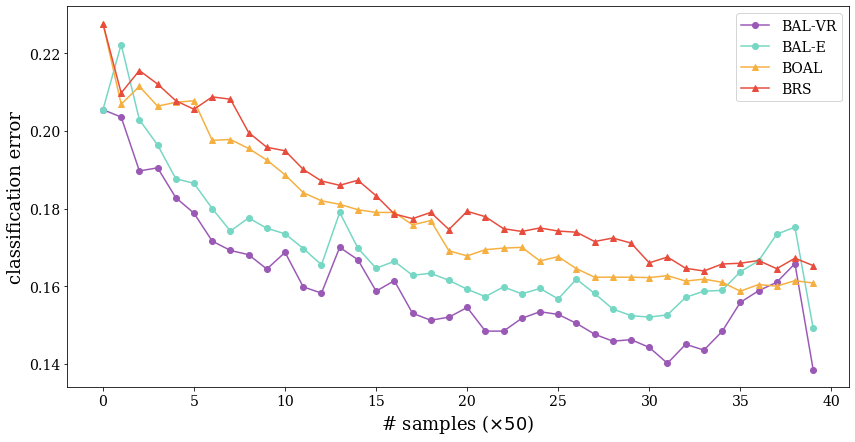

In [5]:
# 500 initial samples
pth_1 = '../results_archive/Blenet300-100_fmnist_isample500_e15_r41_ac1_Klreg-standard2_b100_mcmc20_netType-blundell_variation-ratio_retrain0/'
pth_2 = '../results_archive/Blenet300-100_fmnist_isample500_e15_r41_ac1_Klreg-standard2_b100_mcmc20_netType-blundell_entropy_retrain0/'

# bayesian results
pth_3 = '../results_archive/Blenet300-100_fmnist_isample500_e15_r51_ac1_retrain0/'
pth_4 = '../results_archive/Blenet300-100_fmnist_isample500_e15_r51_ac0_retrain0/'
locs = [pth_1, pth_2, pth_3, pth_4]
labels = ['BAL-VR','BAL-E','BOAL','BRS']
f_name = 'fig_c'
PlotGraph(f_name,locs,labels)

If I normalize with transforms.Normalize((0.1307,), (0.3081,))]), the results are worse. Could it be because of the negative values in the input?

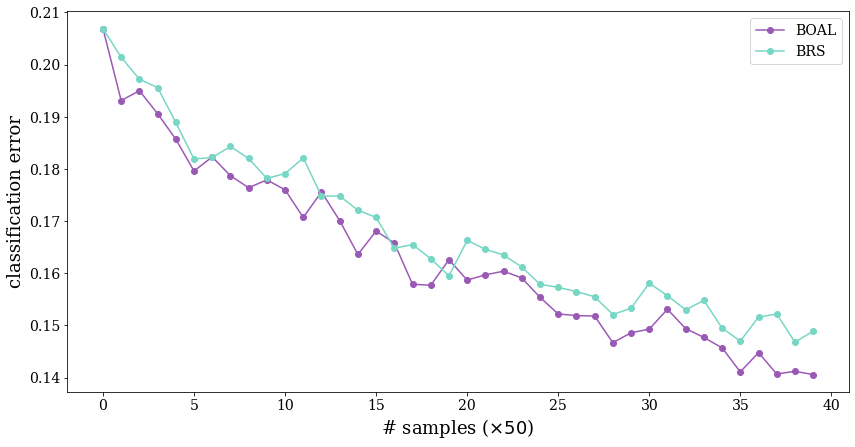

In [14]:
pth_1 = '../results/Blenet300-100_fmnist_isample1000_e15_r41_ac1_b100_Klreg-blundell_retrain0/'
pth_2 = '../results/Blenet300-100_fmnist_isample1000_e15_r41_ac0_b100_Klreg-blundell_retrain0/'
# pth_3 = '../results_archive/Blenet300-100_fmnist_isample1000_e15_r51_ac1_retrain0/'
# pth_4 = '../results_archive/Blenet300-100_fmnist_isample1000_e15_r51_ac0_retrain0/'
locs = [pth_1, pth_2]
# labels = ['BOAL','BRS','BOAL-Old','BRS-Old']
labels = ['BOAL','BRS']
f_name = 'fig_d'
PlotGraph(f_name,locs,labels)

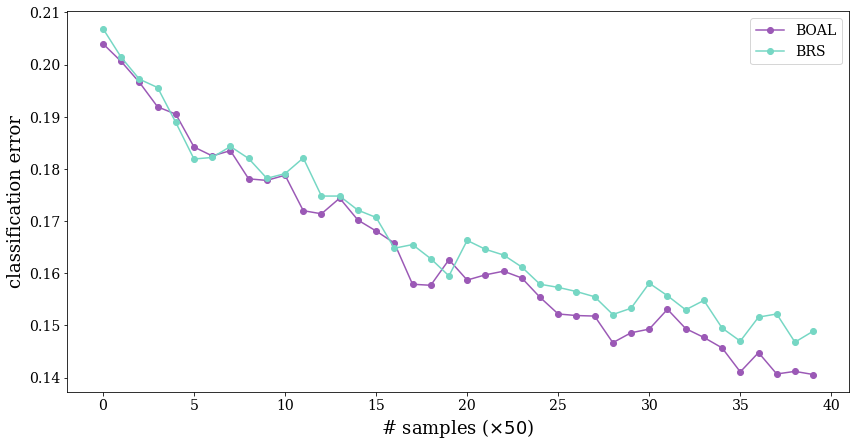

In [21]:
pth_1 = '../results/Blenet300-100_fmnist_isample1000_e15_r41_ac1_b100_Klreg-blundell_retrain0/'
pth_2 = '../results/Blenet300-100_fmnist_isample1000_e15_r41_ac0_b100_Klreg-blundell_retrain0/'
locs = [pth_1,pth_2]
# labels = ['BOAL','BRS','BOAL-Old','BRS-Old']
labels = ['BOAL','BRS']
f_name = 'fig_d'
PlotGraph(f_name,locs,labels)